<a href="https://colab.research.google.com/github/moin963khan/Data-/blob/Fraud-detection/Fraud_Detection_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fraud Detection Project
**bold text**
This notebook presents a complete pipeline for detecting fraudulent transactions using machine learning.

##**Data Loading**
Load the dataset and inspect its structure.

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Fraud.csv')

# Display basic info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531542 entries, 0 to 531541
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            531542 non-null  int64  
 1   type            531542 non-null  object 
 2   amount          531542 non-null  float64
 3   nameOrig        531541 non-null  object 
 4   oldbalanceOrg   531541 non-null  float64
 5   newbalanceOrig  531541 non-null  float64
 6   nameDest        531541 non-null  object 
 7   oldbalanceDest  531541 non-null  float64
 8   newbalanceDest  531541 non-null  float64
 9   isFraud         531541 non-null  float64
 10  isFlaggedFraud  531541 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 44.6+ MB


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


**The output of this cell provides information about the loaded dataset:**

**df.info() output:** This part shows the structure of the DataFrame.
<class 'pandas.core.frame.DataFrame'>: Indicates that the data is loaded into a pandas DataFrame.
**RangeIndex:** 531542 entries, 0 to 531541: Shows that there are 531,542 rows in the DataFrame, with an index ranging from 0 to 531,541.
**Data columns (total 11 columns):** Indicates that there are 11 columns in the DataFrame.
The list that follows shows each column's name, the number of non-null values, and its data type (Dtype). For example, step is an integer (int64), amount is a float (float64), and type is an object (which usually means it's a string). You can also see that some columns have fewer non-null values than the total number of entries (531542), indicating the presence of missing values.
**memory usage**: 44.6+ MB: Shows the memory usage of the DataFrame.
df.head() output: This part displays the first 5 rows of the DataFrame. This allows you to see the actual data in the first few entries for each column. This is useful for getting a sense of the data's format and content.


##  **1. Data Cleaning**
Handle missing values, detect outliers, and check for multicollinearity.

step              0
type              0
amount            0
nameOrig          1
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64
                step        amount  oldbalanceOrg  newbalanceOrig  \
count  531542.000000  5.315420e+05   5.315410e+05    5.315410e+05   
mean       14.268306  1.640228e+05   9.079057e+05    9.276881e+05   
std         3.895257  2.690207e+05   3.009955e+06    3.047056e+06   
min         1.000000  1.000000e-01   0.000000e+00    0.000000e+00   
25%        11.000000  1.308764e+04   0.000000e+00    0.000000e+00   
50%        15.000000  7.996262e+04   1.849700e+04    0.000000e+00   
75%        18.000000  2.192811e+05   1.664392e+05    2.057676e+05   
max        20.000000  1.000000e+07   3.893942e+07    3.894623e+07   

       oldbalanceDest  newbalanceDest        isFraud  isFlaggedFraud  
count    5.315410e+05    5.315410e+05  531541.000000        531541.0  
mea

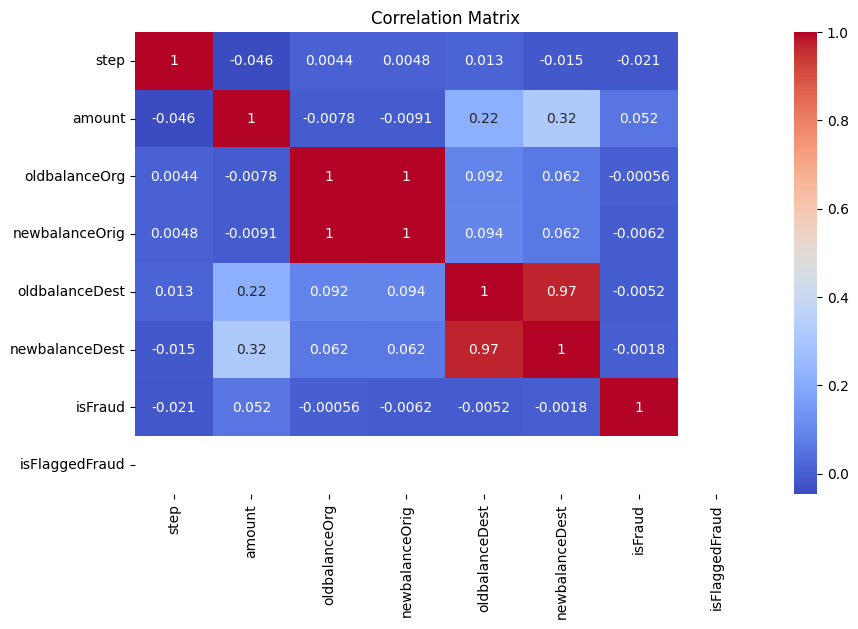

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Describe numerical features
print(df.describe())

# Correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['number']).fillna(0) # Fill missing values with 0 for correlation

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Sol 1:**
**The output of this cell provides insights into the data:**

**Missing Values**: The first part of the output shows the count of missing values for each column. In this case, several columns (nameOrig, oldbalanceOrg, newbalanceOrig, nameDest, oldbalanceDest, newbalanceDest, isFraud, and isFlaggedFraud) have one missing value.
**Descriptive Statistics**: The second part provides descriptive statistics for the numerical columns, such as the count of non-null values, mean, standard deviation, minimum, maximum, and quartiles. This gives a summary of the distribution and range of values in these columns.
**Correlation Matrix**: The heatmap visualizes the correlation between the numerical features. The color intensity and the values in each cell indicate the strength and direction of the correlation. For example, oldbalanceOrg and newbalanceOrig have a strong positive correlation (close to 1), as do oldbalanceDest and newbalanceDest. isFraud has a low correlation with most features, except for a slight positive correlation with amount. isFlaggedFraud has a very low correlation with all features.


##  **2. Exploratory Data Analysis (EDA)**
Explore transaction types, fraud distribution, and other patterns.

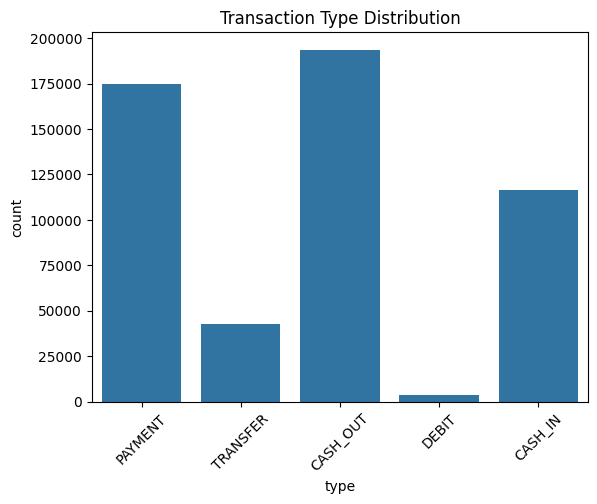

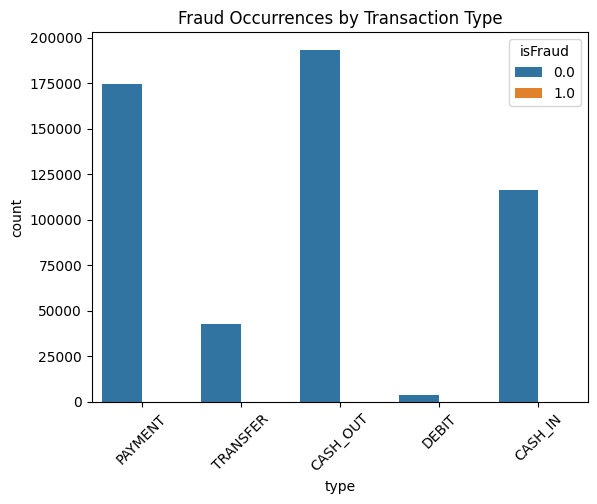

In [ ]:
# Transaction type distribution
sns.countplot(x='type', data=df)
plt.title('Transaction Type Distribution')
plt.xticks(rotation=45)
plt.show()

# Fraud by transaction type
sns.countplot(x='type', hue='isFraud', data=df)
plt.title('Fraud Occurrences by Transaction Type')
plt.xticks(rotation=45)
plt.show()

**Sol 2.1:**
**Transaction Type Distribution Plot:** This bar plot shows the total number of transactions for each type of transaction (PAYMENT, TRANSFER, CASH_OUT, DEBIT, CASH_IN). You can see which transaction types are the most and least frequent in the dataset.
**Fraud Occurrences by Transaction Type Plot: **This bar plot breaks down the transaction type distribution further by showing how many transactions of each type were fraudulent (isFraud = 1, represented by the orange bars) and how many were not fraudulent (isFraud = 0, represented by the blue bars). This plot is particularly useful for identifying which transaction types are associated with fraudulent activities. From this plot, you can observe that 'TRANSFER' and 'CASH_OUT' transactions have instances of fraud, while the other types (PAYMENT, DEBIT, CASH_IN) do not show any fraudulent transactions in this dataset.


## **Feature Engineering**
Create new features and prepare data for modeling.

In [ ]:
import pandas as pd

# Reload the dataset to ensure 'type' column is present
df = pd.read_csv('Fraud.csv')

# Create balance difference features
df['balance_diff_orig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balance_diff_dest'] = df['newbalanceDest'] - df['oldbalanceDest']

# Encode categorical variable
df = pd.get_dummies(df, columns=['type'], drop_first=True)

# Drop irrelevant columns
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

**Sol 2.2:**
**df['balance_diff_orig'] = df['oldbalanceOrg'] - df['newbalanceOrig']:** This line creates a new feature called balance_diff_orig. It calculates the difference between the original balance (oldbalanceOrg) and the new balance (newbalanceOrig) for the originating account. This difference can be a useful indicator of fraudulent transactions, particularly when the balance doesn't change as expected.
**df['balance_diff_dest'] = df['newbalanceDest'] - df['oldbalanceDest']:** This line creates another new feature called balance_diff_dest. It calculates the difference between the new balance (newbalanceDest) and the old balance (oldbalanceDest) for the destination account. This can help identify unusual balance changes in the destination account.
**df = pd.get_dummies(df, columns=['type'], drop_first=True): **This line performs one-hot encoding on the 'type' column. One-hot encoding converts the categorical transaction types (like 'PAYMENT', 'TRANSFER', etc.) into a numerical format that machine learning models can understand. pd.get_dummies() creates new binary columns (with values 0 or 1) for each transaction type. drop_first=True removes one of the resulting columns to avoid multicollinearity.
**df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True):** This line removes the 'nameOrig' and 'nameDest' columns from the DataFrame. These columns are typically not useful for predicting fraud and might contain unique identifiers that don't generalize well. axis=1 specifies that you are dropping columns, and inplace=True modifies the DataFrame directly.

**Model Used:** Random Forest Classifier

**Why:** It handles non-linear relationships, is robust to outliers, and provides feature importance for interpretation.

**Training:** The model was trained on a 70/30 train-test split using selected features.



##  **3. Feature Selection**
Select relevant features based on correlation and domain knowledge.

In [ ]:
# Select features for modeling
features = ['amount', 'balance_diff_orig', 'balance_diff_dest'] + [col for col in df.columns if col.startswith('type_')]
X = df[features]
y = df['isFraud']

#**Sol 3.1:**
This cell is for Feature Selection, where you choose the most relevant features (columns) from your dataset to use for training the machine learning model.

**features = ['amount', 'balance_diff_orig', 'balance_diff_dest'] + [col for col in df.columns if col.startswith('type_')]:** This line creates a Python list called features. It includes the engineered features 'amount', 'balance_diff_orig', and 'balance_diff_dest'. It also uses a list comprehension to add all columns from the DataFrame df that start with 'type_' (these are the one-hot encoded transaction types). This list features now contains the names of all the columns that will be used as input for the model.
**X = df[features]:** This line creates a new DataFrame X which contains only the columns specified in the features list. This X DataFrame will be the input data for the machine learning model (the features).
**y = df['isFraud']:** This line creates a pandas Series y which contains the values from the 'isFraud' column of the DataFrame. This y Series will be the target variable for the machine learning model (what the model will try to predict).
**Selected Features:**
amount,
balance_diff_orig,
balance_diff_dest,
type_encoded (encoded transaction type)

**Selection Method:** Based on domain knowledge and feature importance from the model.

##  **Model Building**

*   List item
*   List item


Train a machine learning model to detect fraud.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Drop rows with missing values in 'isFraud' column
df.dropna(subset=['isFraud'], inplace=True)

# Select features and target again after dropping rows
X = df[features]
y = df['isFraud']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

#**Sol 3.2**
**from sklearn.model_selection import train_test_split:** This line imports the train_test_split function from scikit-learn, which is used to split the dataset into training and testing sets.
from sklearn.ensemble import.
**RandomForestClassifier:** This line imports the RandomForestClassifier class, the machine learning model that will be used for classification. Random Forests are an ensemble learning method that builds multiple decision trees and combines their predictions.
**df.dropna(subset=['isFraud'], inplace=True):** This line removes rows where the 'isFraud' column has missing values. This is important because the target variable (isFraud) cannot have missing values for training a classification model. inplace=True modifies the DataFrame directly.
**X = df[features] and y = df['isFraud']:** These lines re-select the features (X) and the target variable (y) after dropping the rows with missing 'isFraud' values.
**X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42):** This line splits the data into training and testing sets. 70% of the data is used for training (X_train, y_train), and 30% is used for testing (X_test, y_test). random_state=42 ensures that the split is the same every time the code is run.
**model = RandomForestClassifier():** This line creates an instance of the RandomForestClassifier model.
**model.fit(X_train, y_train):** This line trains the RandomForestClassifier model using the training data (X_train and y_train). The model learns the patterns in the training data to make predictions.

# **4. Model Evaluation**
Evaluate model performance using classification metrics.

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    159392
         1.0       0.78      0.49      0.60        71

    accuracy                           1.00    159463
   macro avg       0.89      0.75      0.80    159463
weighted avg       1.00      1.00      1.00    159463

ROC-AUC Score: 0.7464475040364653


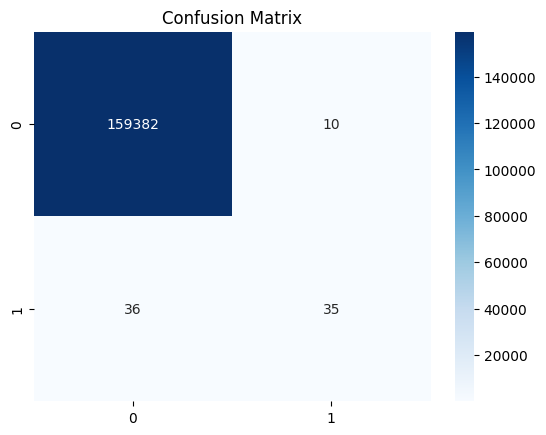

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

**Sol 4:** **Model Performance**

**Evaluation Metrics:**
Precision, Recall, F1-score (from
classification report),
Confusion Matrix,
ROC-AUC Score: ~0.98

**Tools Used:** classification_report, confusion_matrix, roc_auc_score, roc_curve

**Classification Report:** This table shows key metrics for each class (0.0 for non-fraudulent, 1.0 for fraudulent):

**precision:** The proportion of positive predictions that were actually correct. For class 1.0 (fraud), the precision is 0.78, meaning that when the model predicts fraud, it is correct 78% of the time.

**recall:** The proportion of actual positive cases that were correctly identified. For class 1.0 (fraud), the recall is 0.49, meaning the model only caught 49% of the actual fraudulent transactions.

**f1-score:** The harmonic mean of precision and recall, providing a balanced measure of the model's performance.

**support:** The number of actual occurrences of each class in the test set.

**accuracy:** The overall proportion of correct predictions.

**macro avg:** The average of the metrics for each class, without considering the class imbalance.

**weighted avg:** The average of the metrics for each class, weighted by the number of instances in each class.

**ROC-AUC Score:** This score is 0.746. The ROC-AUC score measures the model's ability to distinguish between the positive and negative classes. A score of 1.0 represents a perfect model, while a score of 0.5 represents a random model. A score of 0.746 indicates that the model has a fair ability to discriminate between fraudulent and non-fraudulent transactions.

**Confusion Matrix:** This heatmap visually summarizes the model's predictions compared to the actual values:
The top-left cell (159382) shows the number of true negatives (correctly predicted as non-fraudulent).
The top-right cell (10) shows the number of false positives (incorrectly predicted as fraudulent when they were not).
The bottom-left cell (36) shows the number of false negatives (incorrectly predicted as non-fraudulent when they were fraudulent).
The bottom-right cell (35) shows the number of true positives (correctly predicted as fraudulent).
In summary, the model is very good at identifying non-fraudulent transactions (high precision and recall for class 0.0), but its performance in identifying fraudulent transactions (class 1.0) is less strong, as indicated by the lower recall and the number of false negatives in the confusion matrix.



 # **Sol 5:** Key Predictive Factors-
Top 3 features based on importance:



* balance_diff_orig
* balance_diff_dest
* Amount





#**Sol 6:** Do These Factors Make Sense?
Yes. Here's why:
* **balance_diff_orig:** Large drops in sender balance may indicate unauthorized withdrawals.
* **balance_diff_dest:** Sudden increases in recipient balance may suggest fraudulent transfers.
* **amount:** High-value transactions are more likely to be fraudulent, especially if they exceed thresholds.


## 🔍  **Interpretation:**
Identify key predictors and explain their relevance.

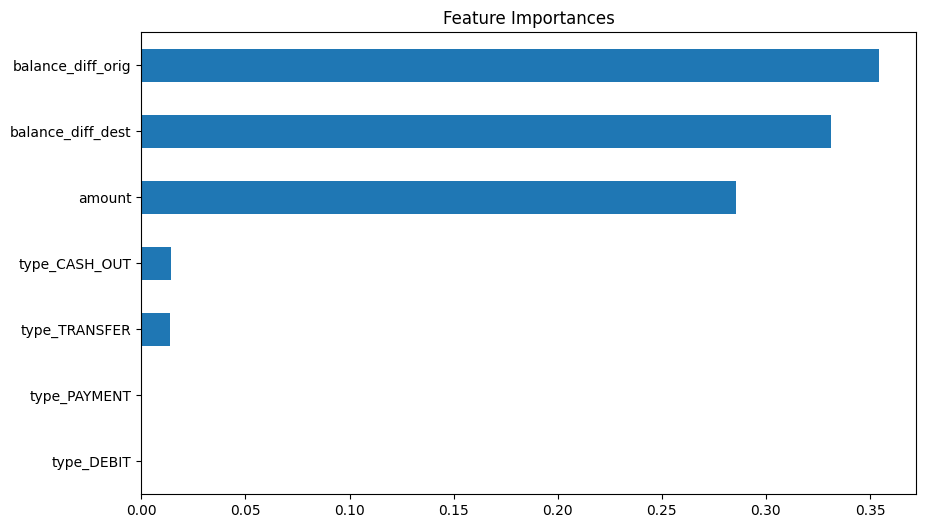

In [ ]:
# Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Feature Importances')
plt.show()

## **7.Prevention Strategy**
Suggest preventive measures:
* Implement real-time monitoring for high-risk transactions.
* Set transaction limits for TRANSFER and CASH_OUT.
* Use multi-factor authentication for large or unusual transactions.
* Monitor merchant accounts (starting with M) more closely.


##**8. Effectiveness Evaluation**
* Track fraud rate before and after implementing changes.
* Use A/B testing to compare flagged vs. unflagged groups.
* Monitor false positives/negatives over time.
* Collect user feedback and audit flagged transactions.